* %1 of Messages in Canada are spam, and %99 of them are real.
* A company developed a new spam detector and this system has been applied on many messages.
* All those messages are divided into two categories, spam or real.
* 80% of messagess which are realy SPAM, have been correctly detecded as spam message
* 9.6% of messagess which are realy REAL, have been wrongly detecded as spam message

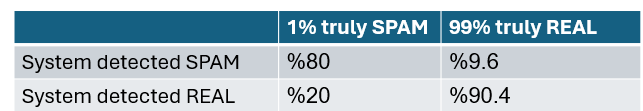


If we receive a message, there are four situations:
* Probabilty of the message is **truly SPAM**, and the system **detect SPAM**, correctly. Then we have **(%1 * %80 = %0.08)**
* Probabilty of the message is **truly REAL**, but the system **detect SPAM**, wrongly. Then we have **(%99 * %9.6 = %0.095)**
* Probabilty of the message is **truly SPAM**, but the system **detect REAL**, wrongly. Then we have **(%1 * %20 = %0.02)**
* Probabilty of the message is **truly REAL**, and the system **detect REAL**, correctly. Then we have **(%99 * %90.4 = %0.894)**

The probablity of a message is truly SPAM is **%0.08**, and the probablity of the system detects SPAM is **%0.08 + %0.095 = %0.175**.

So, the probablity of "Detecting a SPAM message, correctly" is **%0.08 / %0.175 = %45** and it is not 80%!!

### Reading the database

In [1]:
#import data
import pandas as pd
df = pd.read_csv('dataset.csv')

In [5]:
df.sample(5)

,CONTENT,CLASS
1756,and how many subscribers compared to her over ...,1
471,Watch my videos xx﻿,1
410,"I'm sorry Katy Perry, I was being weird. I sti...",0
1184,"Haha, I can&#39;t believe how many kids listen...",0
1472,Okay trust me I&#39;m doing a favor. You NEED ...,1


In [4]:
# Drop the unneccesary columns
df = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'] , axis=1)

In [6]:
# Check for null values. 
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [7]:
# Check the balance
df['CLASS'].value_counts()

CLASS
1    1004
0     951
Name: count, dtype: int64

### What is tokenizing?

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a list storing a single string
message_sample = ['This is a dog cat']
vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message_sample)

CountVectorizer()

In [13]:
# Transform the document into a document-term matrix. 
print(vectorizer_sample.transform(message_sample).toarray())
print(vectorizer_sample.get_feature_names_out())

[[1 1 1 1]]
['cat' 'dog' 'is' 'this']


In [14]:
#another example
vectorizer_sample.transform(['cat cat cat is is this is this dog']).toarray()

array([[3, 1, 3, 2]], dtype=int64)

### Defining the inputs and the target

In [15]:
# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# Define the inputs and the target
inputs = df['CONTENT']
target = df['CLASS']

In [16]:
# Create a training and a testing dataset.
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = target)

In [17]:
# Check the counts on the real and the spam messages in the training dataset.
y_train.value_counts(normalize = True)
y_train.value_counts()

CLASS
1    803
0    761
Name: count, dtype: int64

In [18]:
# Check the counts on the ham and the spam messages in the test dataset.
y_test.value_counts(normalize = True)
y_test.value_counts()

CLASS
1    201
0    190
Name: count, dtype: int64

### Tokenizing the Emails

In [19]:
# Create an instance of the vectorizer class.
vectorizer = CountVectorizer()

In [20]:
# train the model
x_train_transf = vectorizer.fit_transform(x_train)

In [21]:
# Apply on tets
x_test_transf = vectorizer.transform(x_test)

In [22]:
# dimension of verctorized train
x_train_transf.shape

(1564, 3905)

In [23]:
# dimension of verctorized test
x_test_transf.shape

(391, 3905)

### Model Building

In [27]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Create classifier
clf = MultinomialNB()

# Fit the model to the training data
clf.fit(x_train_transf, y_train)

MultinomialNB()

### Performing the model and evaluation

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# make a prediction on test
y_test_pred = clf.predict(x_test_transf)

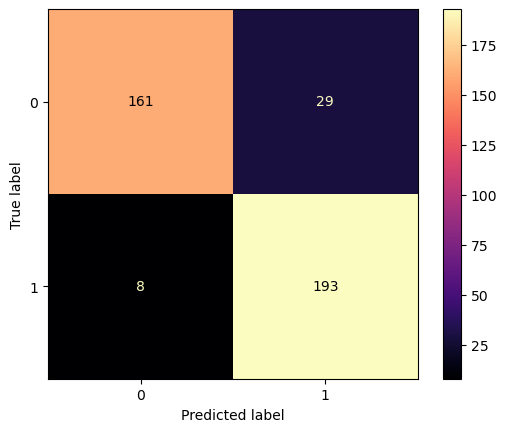

In [29]:
# Create the confusion matrix 
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [30]:
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['REAL', 'SPAM']))

              precision    recall  f1-score   support

        REAL       0.95      0.85      0.90       190
        SPAM       0.87      0.96      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.90      0.90       391
weighted avg       0.91      0.91      0.90       391



### Correclty indentified SPAM or REAL, over all predicted ones.

<hr>

The probabilty of "detecteing as a **SPAM** message while that message is **truly SPAM**".

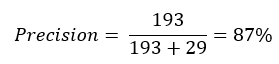

The probabilty of "detecteing as a **SPAM** message while that message is **truly REAL**".

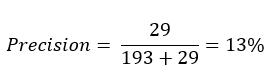

<hr>

The probabilty of "detecteing as a **REAL** message while that message is **truly REAL**".

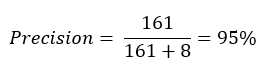

The probabilty of "detecteing as a **REAL** message while that message is **truly SPAM**".

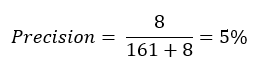

<HR>

### How many SPAM or REAL message the model has caught and how many missed

Among **all SPAM messages**, the model **was successful** to detect them just 96%.

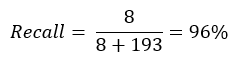

<hr>

Among **all REAL messages**, the model **was successful** to detect them just 85%.

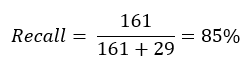

### Unseen Data Predicition

In [34]:
# 1 means spam and 0 means real
predict_data = vectorizer.transform(['you can go to the next level',
                                     'my name is mehrdad'])


clf.predict(predict_data)

array([1, 1], dtype=int64)